# Vinay Nambiar
# BL.EN.U4CSE21221

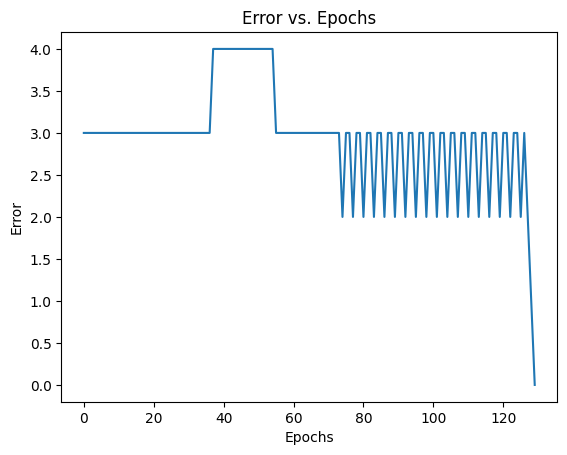

Number of epochs needed for convergence: 130
Final weights: weight0=-0.10000000000000765, weight1=0.1000000000000001, weight2=0.05000000000000032


In [5]:
#A1
import numpy as np
import matplotlib.pyplot as plt

# Initialize the perceptron weights and learning rate
weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# Define the AND gate input data and target values
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_values = np.array([0, 0, 0, 1])

# Initialize the error list to store error values for each epoch
error_values = []

# Define the step activation function
def step_activation(x):
    return 1 if x >= 0 else 0

# Training the perceptron
num_epochs = 0
converged = False

while not converged:
    total_error = 0
    for i in range(len(input_data)):
        # Calculate the net input
        net_input = np.dot(weights, np.concatenate(([1], input_data[i])))

        # Apply step activation function
        output = step_activation(net_input)

        # Calculate the error
        error = target_values[i] - output
        total_error += error ** 2

        # Update weights
        weights += learning_rate * error * np.concatenate(([1], input_data[i]))

    error_values.append(total_error)

    if total_error == 0:
        converged = True

    num_epochs += 1

# Plotting the error values
plt.plot(range(num_epochs), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()

# Print the number of epochs needed for convergence
print(f'Number of epochs needed for convergence: {num_epochs}')

# Print the final weights
print(f'Final weights: weight0={weights[0]}, weight1={weights[1]}, weight2={weights[2]}')

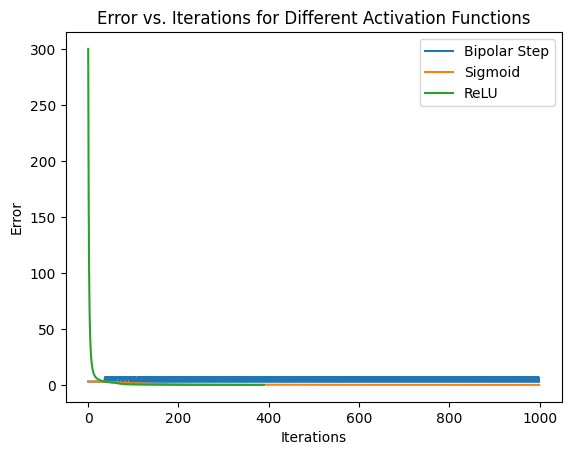

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial weights and learning rate
initial_weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05
convergence_error = 0.002
max_iterations = 1000

# Define the AND gate input data and target values
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_values = np.array([0, 0, 0, 1])

# Initialize error lists for each activation function
error_functions = {
    'Bipolar Step': [],
    'Sigmoid': [],
    'ReLU': []
}

# Define activation functions
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

# Iterate through activation functions
for activation_function in error_functions.keys():
    weights = initial_weights.copy()
    iterations = 0
    converged = False

    while not converged and iterations < max_iterations:
        total_error = 0
        for i in range(len(input_data)):
            # Calculate the net input
            net_input = np.dot(weights, np.concatenate(([1], input_data[i])))

            # Apply the chosen activation function
            if activation_function == 'Bipolar Step':
                output = bipolar_step_activation(net_input)
            elif activation_function == 'Sigmoid':
                output = sigmoid_activation(net_input)
            else:
                output = relu_activation(net_input)

            # Calculate the error
            error = target_values[i] - output
            total_error += error ** 2

            # Update weights
            weights += learning_rate * error * np.concatenate(([1], input_data[i]))

        error_functions[activation_function].append(total_error)

        # Check for convergence
        if total_error <= convergence_error:
            converged = True

        iterations += 1

# Plotting the error values for each activation function
for activation_function, error_values in error_functions.items():
    plt.plot(range(len(error_values)), error_values, label=activation_function)

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs. Iterations for Different Activation Functions')
plt.legend()
plt.show()